<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this step

1. I have choosen vanilla architecture of 6 convolution layer and 2 transtion blocks (maxpool) 
2. Used GAP in the the last layer. 
3. My target is to achieve 99% validation accuracy
4. Once I get 99% accuracy , I know I can refine the mode further to achieve higher accuracy with less parameters
5. Run it for 20 epochs to study how the accuracy changes in vanila architecture

Result: 
======
1. Observed Train accuracy: 99.58%
2. Validation accuracy:99.23%
3. Number of parameters: 40,202


Analysis: 
========

1. I could see that validation accuracy is steadily increasing over epochs, and finally got validation accuracy of 99.23%. This tells me that it is a good architecture to explore further. 

2. I also noticed that train accuracy is 99.58% which is much higher than validation accuracy of 99.23%,. This means that the model is possibly overfitting. But as number of parameters is 40,202 which is around 4 times my target parameters, I will try to reduce the parameters in next step and observe the impact before trying out other options to increase the validation accuracy


In [2]:
from model import model3 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (3, 32, 32)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           1,024
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
        MaxPool2d-12           [-1, 32, 16, 16]               0
           Conv2d-13           [-1, 16, 16, 16]           4,608
             ReLU-14           [-1, 16,

G:\ERA_S8\model.py:362: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize - Yes that's the only thing i am going to apply on the data for now


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader(batch_size, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Files already downloaded and verified


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


Loss=1.3088586330413818 Batch_id=390 Accuracy=36.37: 100%|███████████████████████████| 391/391 [04:25<00:00,  1.47it/s]



Test set: Average loss: 1.4222, Accuracy: 4841/10000 (48.41%)

Currently Executing Epoch: 2


Loss=1.3311268091201782 Batch_id=390 Accuracy=49.18: 100%|███████████████████████████| 391/391 [04:28<00:00,  1.46it/s]



Test set: Average loss: 1.2048, Accuracy: 5719/10000 (57.19%)

Currently Executing Epoch: 3


Loss=1.2068555355072021 Batch_id=390 Accuracy=55.04: 100%|███████████████████████████| 391/391 [04:29<00:00,  1.45it/s]



Test set: Average loss: 1.0946, Accuracy: 6117/10000 (61.17%)

Currently Executing Epoch: 4


Loss=1.073136329650879 Batch_id=390 Accuracy=58.18: 100%|████████████████████████████| 391/391 [04:29<00:00,  1.45it/s]



Test set: Average loss: 1.0058, Accuracy: 6459/10000 (64.59%)

Currently Executing Epoch: 5


Loss=1.0094655752182007 Batch_id=390 Accuracy=60.49: 100%|███████████████████████████| 391/391 [04:29<00:00,  1.45it/s]



Test set: Average loss: 0.9505, Accuracy: 6592/10000 (65.92%)

Currently Executing Epoch: 6


Loss=1.2154161930084229 Batch_id=390 Accuracy=62.24: 100%|███████████████████████████| 391/391 [04:51<00:00,  1.34it/s]



Test set: Average loss: 0.9231, Accuracy: 6773/10000 (67.73%)

Currently Executing Epoch: 7


Loss=0.9609563946723938 Batch_id=390 Accuracy=63.21: 100%|███████████████████████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 0.9243, Accuracy: 6687/10000 (66.87%)

Currently Executing Epoch: 8


Loss=1.1027624607086182 Batch_id=390 Accuracy=64.34: 100%|███████████████████████████| 391/391 [04:26<00:00,  1.47it/s]



Test set: Average loss: 0.8664, Accuracy: 6939/10000 (69.39%)

Currently Executing Epoch: 9


Loss=0.8944815397262573 Batch_id=390 Accuracy=65.74: 100%|███████████████████████████| 391/391 [04:28<00:00,  1.45it/s]



Test set: Average loss: 0.8126, Accuracy: 7075/10000 (70.75%)

Currently Executing Epoch: 10


Loss=0.7896400690078735 Batch_id=390 Accuracy=66.61: 100%|███████████████████████████| 391/391 [04:25<00:00,  1.47it/s]



Test set: Average loss: 0.8094, Accuracy: 7128/10000 (71.28%)

Currently Executing Epoch: 11


Loss=0.9542972445487976 Batch_id=390 Accuracy=67.16: 100%|███████████████████████████| 391/391 [04:28<00:00,  1.46it/s]



Test set: Average loss: 0.7913, Accuracy: 7168/10000 (71.68%)

Currently Executing Epoch: 12


Loss=0.8592678904533386 Batch_id=390 Accuracy=67.83: 100%|███████████████████████████| 391/391 [04:29<00:00,  1.45it/s]



Test set: Average loss: 0.8148, Accuracy: 7121/10000 (71.21%)

Currently Executing Epoch: 13


Loss=1.0709142684936523 Batch_id=390 Accuracy=68.67: 100%|███████████████████████████| 391/391 [04:29<00:00,  1.45it/s]



Test set: Average loss: 0.7677, Accuracy: 7258/10000 (72.58%)

Currently Executing Epoch: 14


Loss=0.6097558736801147 Batch_id=390 Accuracy=68.99: 100%|███████████████████████████| 391/391 [04:29<00:00,  1.45it/s]



Test set: Average loss: 0.7486, Accuracy: 7343/10000 (73.43%)

Currently Executing Epoch: 15


Loss=0.7811790108680725 Batch_id=390 Accuracy=69.38: 100%|███████████████████████████| 391/391 [04:25<00:00,  1.47it/s]



Test set: Average loss: 0.7360, Accuracy: 7398/10000 (73.98%)

Currently Executing Epoch: 16


Loss=0.784194827079773 Batch_id=390 Accuracy=69.94: 100%|██████████████████████████| 391/391 [6:14:34<00:00, 57.48s/it]



Test set: Average loss: 0.7335, Accuracy: 7403/10000 (74.03%)

Currently Executing Epoch: 17


Loss=0.9658107757568359 Batch_id=390 Accuracy=70.36: 100%|███████████████████████████| 391/391 [04:30<00:00,  1.44it/s]



Test set: Average loss: 0.7272, Accuracy: 7437/10000 (74.37%)

Currently Executing Epoch: 18


Loss=0.9576625823974609 Batch_id=390 Accuracy=70.82: 100%|███████████████████████████| 391/391 [04:28<00:00,  1.45it/s]



Test set: Average loss: 0.7038, Accuracy: 7537/10000 (75.37%)

Currently Executing Epoch: 19


Loss=1.1804978847503662 Batch_id=390 Accuracy=71.34: 100%|███████████████████████████| 391/391 [04:32<00:00,  1.44it/s]



Test set: Average loss: 0.6899, Accuracy: 7556/10000 (75.56%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

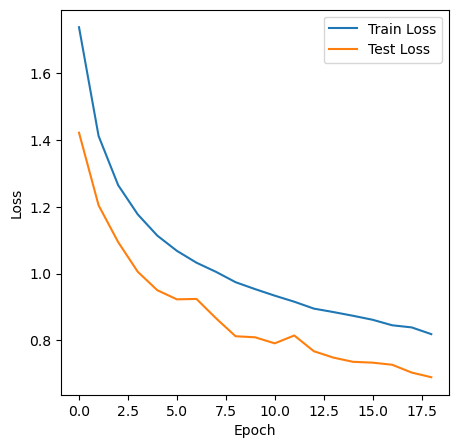

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

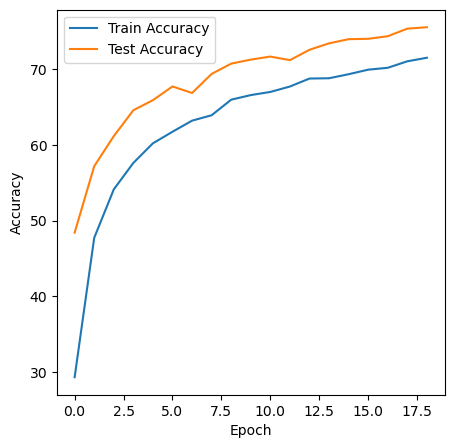

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
